# Fruits Recognition System using k-Nearest Neighbors (KNN)

In this notebook, we'll explore the implementation of a fruits recognition system using the k-Nearest Neighbors (KNN) classification algorithm. The goal is to classify different types of fruits based on their images.

## Dataset

Train and test images splited  77%, 33% of Apples, Mangoes and Oranges.

## Approach

We'll employ the KNN algorithm for this recognition system. The KNN algorithm is a simple yet powerful classification method that assigns a label to a data point based on the majority class among its k-nearest neighbors. In our case, the features extracted from the images will be used to determine the similarity between different fruit samples.

# Data Upload and Extraction

To begin, we need to upload our dataset directly to this Colab environment. The dataset is compressed in a RAR file named `FruitsDB.rar`. Follow the steps below to upload and extract the dataset:

1. Upload the RAR file:
    - Run the code cell below to prompt the file upload dialog.
    - Select the `FruitsDB.rar` file from your local machine.

2. Extraction of Dataset:
    - The uploaded RAR file will be extracted to the `/content` directory in this Colab environment.

Let's proceed with the data upload and extraction:


In [11]:
from google.colab import files

# Specify the path to your RAR file on your local machine
local_rar_path = "D:/course/AI/project/Fruit_Recognition-master/FruitsDB.rar"

# Upload the RAR file directly to Colab
uploaded = files.upload()

# Specify the name of the uploaded RAR file
rar_file_name = list(uploaded.keys())[0]

# Specify the destination directory in Colab
colab_directory = "/content"

# Copy the RAR file from your local path to the Colab directory
!cp "{local_rar_path}" "{colab_directory}"

# Unrar the uploaded file
!unrar x {rar_file_name} {colab_directory}


Saving FruitsDB.rar to FruitsDB.rar
cp: cannot stat 'D:/course/AI/project/Fruit_Recognition-master/FruitsDB.rar': No such file or directory

UNRAR 6.11 beta 1 freeware      Copyright (c) 1993-2022 Alexander Roshal


Extracting from FruitsDB.rar

Creating    /content/FruitsDB                                         OK
Creating    /content/FruitsDB/Apples                                  OK
Creating    /content/FruitsDB/Apples/Test                             OK
Extracting  /content/FruitsDB/Apples/Test/Royal_01_1.JPG                   0%  OK 
Extracting  /content/FruitsDB/Apples/Test/Royal_01_2.JPG                   0%  OK 
Extracting  /content/FruitsDB/Apples/Test/Royal_01_3.JPG                   0%  OK 
Extracting  /content/FruitsDB/Apples/Test/Royal_01_4.JPG                   0%  OK 
Extracting  /content/FruitsDB/Apples/Test/Royal_03_1.JPG                   1%  OK 
Extracting  /content/FruitsDB/Apples/Test/Royal_03_2.JPG                 

# Image Processing and Feature Extraction

In this section, we'll perform essential image processing and feature extraction tasks as part of the preprocessing pipeline for our fruits recognition system.

We'll use the following Python libraries for various image-related operations:
- `cv2`: OpenCV for image processing.
- `numpy`: Essential for numerical operations on image data.
- `matplotlib`: Visualization library for displaying images and plots.
- `pandas`: Useful for organizing and manipulating data.
- `scikit-image`: A collection of algorithms for image processing.

We'll also utilize Histogram of Oriented Gradients (HOG) features, a powerful technique for image feature extraction. HOG features provide a compact representation of the image's structure and are commonly used in object recognition.

Let's proceed with the image processing and feature extraction code:


In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

import pandas as pd

from skimage.color import rgb2gray
from skimage.transform import rescale, resize, downscale_local_mean

from sklearn.model_selection import train_test_split
from skimage import data, color, feature
from skimage.feature import hog

import glob

# Load Data Function

To facilitate the loading of our fruit dataset, we've implemented a custom function named `load_data`. This function takes two parameters, `fruit` and `tipo` (type), and retrieves images of the specified fruit type from the dataset.

Here's a brief explanation of the function's steps:
- Constructs the file path based on the provided `fruit` and `tipo`.
- Utilizes the `glob` module to retrieve all files matching the constructed path.
- Reads each image using OpenCV (`cv2`) and converts the color format to RGB.
- Appends the image and corresponding label (fruit type) to the respective arrays.

Let's take a closer look at the `load_data` function:

In [13]:
def load_data(fruit, tipo):
    label=[]
    arr = []
    strr = "FruitsDB/"+fruit+"/" + tipo + "/*"
    for file_ in glob.glob(strr):
      img = cv2.imread(file_)
      img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
      arr.append(img)
      label.append(fruit)

    return arr,label

# Dataset Composition Function

The `whole_train_data` function is instrumental in constructing a consolidated training dataset for our fruits recognition system. It takes a parameter, `tipo` (type), to specify whether the dataset is intended for training or testing.

Key steps in the function include:
- Utilizing the previously defined `load_data` function to retrieve images and labels for different fruit types (Apples, Mangoes, Oranges).
- Concatenating the data and labels from each fruit type to form a unified training dataset.

Let's examine the implementation of the `whole_train_data` function:

In [14]:
def whole_train_data(tipo):
  apples_data, apples_label = load_data('Apples', tipo)
  mangoes_data, mangoes_label = load_data('Mangoes', tipo)
  oranges_data, oranges_label = load_data('Oranges', tipo)
  data =np.concatenate((apples_data,mangoes_data,oranges_data))
  labels =np.concatenate((apples_label, mangoes_label, oranges_label))
  return data, labels

# Load Training and Testing Datasets

Now, let's use the `whole_train_data` function to load both the training and testing datasets. This will enable us to prepare the data for training our fruits recognition system.

In [15]:
data_train, labels_train = whole_train_data('Train')
data_test, labels_test = whole_train_data('Test')

# Dataset Dimensions

Let's examine the dimensions of our training dataset to better understand its structure.


In [16]:
data_train.shape, labels_train.shape

((220, 800, 1200, 3), (220,))

# Image Preprocessing Function

To enhance the efficiency of our fruits recognition system, we implement the `preprocessing` function. This function is designed to perform crucial preprocessing steps on an input array of images.

Key steps in the function include:
- Converting each image to grayscale using OpenCV (`cv2`).
- Resizing each image to a standardized dimension of 72x72 pixels.

Let's delve into the implementation of the `preprocessing` function:

In [17]:
def preprocessing(arr):
    arr_prep=[]
    for i in range(arr.shape[0]):
        img=cv2.cvtColor(arr[i], cv2.COLOR_BGR2GRAY)
        img=resize(img, (72, 72),anti_aliasing=True)
        arr_prep.append(img)
    return arr_prep

# Image Preprocessing

Now, let's apply the previously defined `preprocessing` function to our training and testing datasets. This step is crucial for standardizing the dimensions and color representations of our images.

In [18]:
data_train_p = preprocessing(data_train)
data_test_p = preprocessing(data_test)

# Check Data Type

Let's examine the data type of the first element in our original training dataset.


In [19]:
type(data_train[0])

numpy.ndarray

# Feature Extraction using Histogram of Oriented Gradients (HOG)

To enhance our fruits recognition system, we employ the Histogram of Oriented Gradients (HOG) technique for feature extraction. The following functions, `ExtractHOG` and `preprocessing_part_two`, contribute to this critical phase of our system.

### ExtractHOG Function

The `ExtractHOG` function is dedicated to computing HOG features for a given image.


In [20]:
def ExtractHOG(img):
    ftr,_=hog(img, orientations=8, pixels_per_cell=(16, 16),
            cells_per_block=(1, 1), visualize=True, multichannel=False)
    return ftr

def preprocessing_part_two(arr):
    arr_feature=[]
    for i in range(np.shape(arr)[0]):
        arr_feature.append(ExtractHOG(arr[i]))
    return arr_feature

# Feature Extraction using HOG for Training and Testing Data

Now, let's apply the HOG feature extraction to our preprocessed training and testing datasets. This step ensures that our model will be trained on representative features extracted from the images.

In [21]:
data_train_ftr = preprocessing_part_two(data_train_p)
data_test_ftr= preprocessing_part_two(data_test_p)

<ipython-input-20-35101dcda1e3>:2: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ftr,_=hog(img, orientations=8, pixels_per_cell=(16, 16),


# k-Nearest Neighbors (KNN) Classification

We are now ready to train our fruits recognition model using the k-Nearest Neighbors (KNN) algorithm. The `KNeighborsClassifier` from scikit-learn is employed for this task.

In [22]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn_clf = KNeighborsClassifier(n_jobs=-1, weights='distance', n_neighbors=11)
knn_clf.fit(data_train_ftr, labels_train)

KNeighborsClassifier(n_jobs=-1, n_neighbors=11, weights='distance')

# Model Prediction and Evaluation

Let's now use our trained k-Nearest Neighbors (KNN) model to make predictions on the testing dataset and evaluate its accuracy.


In [23]:
y_knn_pred = knn_clf.predict(data_test_ftr)

In [24]:
print(accuracy_score(labels_test, y_knn_pred)*100,'%')

89.39393939393939 %


# Image Display Function

To visually inspect the predictions made by our fruits recognition model, we define the `showImg` function. This function is responsible for displaying images along with their corresponding labels.

In [25]:
def showImg(img, name):
    plt.axis("off")
    plt.title(name)
    plt.imshow(img)
    plt.show()

# Visualizing Model Prediction

Let's visually assess the fruits recognition model's prediction for a randomly selected sample from the testing dataset.

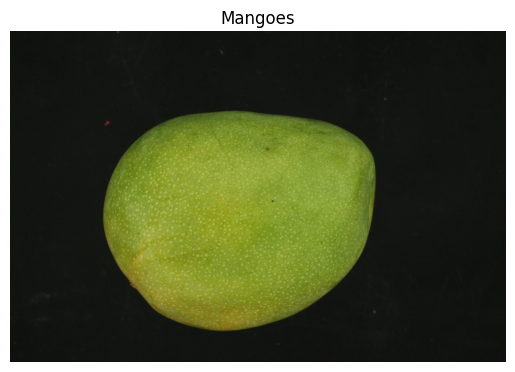

In [26]:
from random import seed
from random import randint
x_ = randint(0, data_test.shape[0])
showImg(data_test[x_], y_knn_pred[x_])